<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Step 1:</span> Data Wrangling</h1>
<hr>


Sometimes machine learning applications require to **wrangle** the data first. 
That is break down and restructure our dataset (a sort of creative destruction).

Our dataset is **transaction-level** ecommerce data.
    - each observation in the raw dataset is for a single transaction - one item, one customer, one purchase.

We want **customer-level** data:

To get a **customer-level** data, (since we want to build clusters for customers, not transactions) 
    - we shall **group transactions by customer** and **engineer features to the customer-level**.

* This is a blend of exploratory analysis, data cleaning, and feature engineering.  



Essential steps:
1. [Transaction-level exploration](#exploration)
2. [Transaction-level cleaning](#cleaning)
3. [Customer-level feature engineering](#customer-level)
4. [Intermediary levels](#intermediary-levels)
5. [Joining together the ABT](#joining)


In [69]:
#importing ze libraries

# NumPy for numerical computing
import numpy as np
# Pandas for DataFrames
import pandas as pd
# Matplotlib for visualization
import matplotlib.pyplot as plt
# display plots in the notebook
%matplotlib inline
# Seaborn for easier visualization
import seaborn as sns

Importing the dataset..

In [70]:
# international online transactions data from CSV
data = pd.read_csv('project_files/int_online_tx.csv')

Now we're ready to jump into wrangling the data!

# 1. Base level exploration

Even though we eventually want customer-level data, it's never a bad idea to do some basic exploratory analysis at the basic table scope. 

**displaying the shape of the dataset**

In [71]:
data.shape

(35116, 8)

**Note: **

**m**: raw observations = 35116

**n**: raw features = 8

In [72]:
# First 10 rows of data
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France
5,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/10 8:45,0.85,12583.0,France
6,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12/1/10 8:45,1.25,12583.0,France
7,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12/1/10 8:45,2.95,12583.0,France
8,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12/1/10 8:45,2.95,12583.0,France
9,536370,22629,SPACEBOY LUNCH BOX,24,12/1/10 8:45,1.95,12583.0,France


There is an observation for every item every customer buys, per purchase.

**Displaying distribution of transactions by country.**

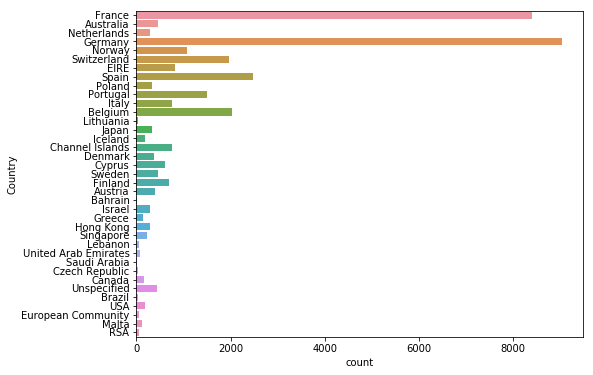

In [73]:
# fitting size of figure
plt.figure(figsize=(8,6))

# Bar plot by country
sns.countplot(y='Country', data=data)
%clear

**Notes**:
    - many sparse classes.
    - mostly European countries(particularly France & Germany)
    - these are transaction frequencies, so careful to draw conclusions about # of customers

# 2. Transaction-level cleaning

Cleaning up at transaction level before aggregating to customer level.

**Displaying the number of missing observations for each feature.**

In [74]:
# Missing data by feature
data.isnull().sum()

InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     1418
Country           0
dtype: int64

Since we are looking for specific clusters of inidividual *customers*, labeling/flagging and filling missing data will not be helpful for segmentation (as it would be for classification or regression). 

Thus, we should consider askign why there are no id's, but cannot incluide them in our **customter cluster** model if we cant differentiate between customers.

**Dropping observations with missing customer ID's.**

In [75]:
# Only keep transactions with CustomerID's
data = data[data.CustomerID.notnull()]

**Convert CustomerID's from floats to integers.**
* Not required, but useful.
* ID's should be saved as strings or integers so they arent mixed up with other continuous numeric features.

In [76]:
# Convert customer ID's into integers
data['CustomerID'] = data.CustomerID.astype(int)

# Display CustomerID's to confirm integer conversion
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France


**Creating the standard<code style="color:steelblue">'Sales'</code> interaction feature.**

In [77]:
# Sales' interaction feature
data['Sales'] = data.Quantity * data.UnitPrice

# Display first 5 Sales values to confirm
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France,90.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France,90.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France,45.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France,10.2
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France,15.6


**Saving cleaned transaction-level data as <code style="color:crimson">cleaned_transactions.csv</code>.**
* Useful table to return to, to create the features for individual items.

In [78]:
# Save cleaned transaction-level data
# setting index=None to avoid auto-generated nonsense
data.to_csv('cleaned_transactions.csv', index = None)

# 3. Customer-level feature engineering

Time to **roll it up** our transaction-level dataset to the customer level (to feed into our clustering algorithims).

**We want 1 customer per row**. For each customer we also want:
    - Number of unique purchases by the customer
    - Average cart value for the customer
    - Total sales for the customer
    - And anything useful...


**Firstly, aggegrating invoice data by customer. We'll engineer the feature:**
* <code style="color:steelblue">'total_transactions'</code> - the total number of unique transactions for each customer.

In [79]:
# Aggegrate invoice data
invoice_data = data.groupby('CustomerID').InvoiceNo.agg({ 'total_transactions' : 'nunique' })

# Display invoice data for first 5 customers
invoice_data.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,total_transactions
CustomerID,
12347,7
12348,4
12349,1
12350,1
12352,8


**Aggregating product data by customer:**

** Engineering 2 features:**
* <code style="color:steelblue">'total_products'</code> - the total number of **products** purchased by each customer (not the unit Quantity within each product).
* <code style="color:steelblue">'total_unique_products'</code> - the number of unique products purchased by each customer.

In [80]:
# Aggregate product data
product_data = data.groupby('CustomerID').Description.agg({'total_unique_products' : 'nunique', 'total_products' : 'count'})

# Display product data of first 5 customers
product_data.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,total_unique_products,total_products
CustomerID,,
12347,103,182
12348,22,31
12349,73,73
12350,17,17
12352,59,85


**Aggregating sales data by customer. **
** Engineering 2 features:**
* <code style="color:steelblue">'total_sales'</code> - the total sales for each customer.
* <code style="color:steelblue">'avg_product_value'</code>- the average value of the products purchased by the customer (not the UnitPrice).

In [81]:
# Roll up sales data
sales_data = data.groupby('CustomerID').Sales.agg({'total_sales' : 'sum', 'avg_product_value' : 'mean'})

# Display sales data of first 5 customers
sales_data.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,total_sales,avg_product_value
CustomerID,,
12347,4310.00,23.681319
12348,1797.24,57.975484
12349,1757.55,24.076027
12350,334.40,19.670588
12352,2506.04,29.482824


# 4. Intermediary levels

For some features we can't roll up to customer-level directly... so we'll create intermediary levels first.

**Aggregating cart data at the "cart-level."** 

Steps:
* Group by <code style="color:steelblue">'CustomerID'</code> AND by <code style="color:steelblue">'InvoiceID'</code>. to treat each invoice as a "cart."
* Computing <code style="color:steelblue">'cart_value'</code>, taking the sum of the Sales column. This is the total sales by invoice (i.e. cart).
*  <code style="color:steelblue">.reset_index()</code> to turn CustomerID and InvoiceID back into regular columns so we can perform other aggregations.

In [82]:
# Aggregate cart-level data (i.e. invoice-level)
cart_data = data.groupby(['CustomerID', 'InvoiceNo']).Sales.agg({'cart_value' : 'sum'})

# Reset index
cart_data.reset_index(inplace=True)

# Display first 5 Carts
cart_data.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,CustomerID,InvoiceNo,cart_value
0,12347,537626,711.79
1,12347,542237,475.39
2,12347,549222,636.25
3,12347,556201,382.52
4,12347,562032,584.91


**Aggregating cart data by customer.
Engineering 3 features:**
* <code style="color:steelblue">'avg_cart_value'</code> - average cart value by customer.
* <code style="color:steelblue">'min_cart_value'</code> - minimum cart value by customer.
* <code style="color:steelblue">'max_cart_value'</code> - maximum cart value by customer.

In [84]:
# Aggregate cart data (at customer-level)
agg_cart_data = cart_data.groupby('CustomerID').cart_value.agg({'avg_cart_value' : 'mean', 'min_cart_value' : 'min','max_cart_value': 'max'})


# Display aggregate cart data of first 5 customers
agg_cart_data.head()


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,
12347,615.714286,224.82,1294.32
12348,449.310000,227.44,892.80
12349,1757.550000,1757.55,1757.55
12350,334.400000,334.40,334.40
12352,313.255000,120.33,840.30


<span id="joining"></span>
# 5. ABT Construction

Joining the multiple dataframes that each contain customer-level features. 

* By default, dataframes will be joined on their index... In this case, it will join by CustomerID.

In [86]:
# Join together customer-level ABT
customer_data = invoice_data.join([product_data, sales_data,agg_cart_data])

# Display customer-level data for first 5 customers
customer_data.head()

,total_transactions,total_unique_products,total_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,
12347,7,103,182,4310.00,23.681319,615.714286,224.82,1294.32
12348,4,22,31,1797.24,57.975484,449.310000,227.44,892.80
12349,1,73,73,1757.55,24.076027,1757.550000,1757.55,1757.55
12350,1,17,17,334.40,19.670588,334.400000,334.40,334.40
12352,8,59,85,2506.04,29.482824,313.255000,120.33,840.30


**save <code style="color:crimson">customer_df</code> as our analytical base table.**
* **Note:** We will not set <code style="color:steelblue">index=None</code> because we want to keep the CustomerID's as the index.

In [87]:
# Save analytical base table
customer_data.to_csv('analytical_base_table.csv')


That's the data wrangling!

Recap of essential steps:
* Explore and clean transaction-level dataset.
* Roll up to the customer level, aggregating new features along the way.
* Groupby intermediary levels to create the tricky features.
* Join customer-level datasets together into one analytical base table.